In [7]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

## Basic Data Science and ML Pipeline

In [8]:
#Loading the dataset
train_data = pd.read_csv('train.csv')

#Print the first 5 rows of the dataframe.
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


#### Heatmap for unclean data

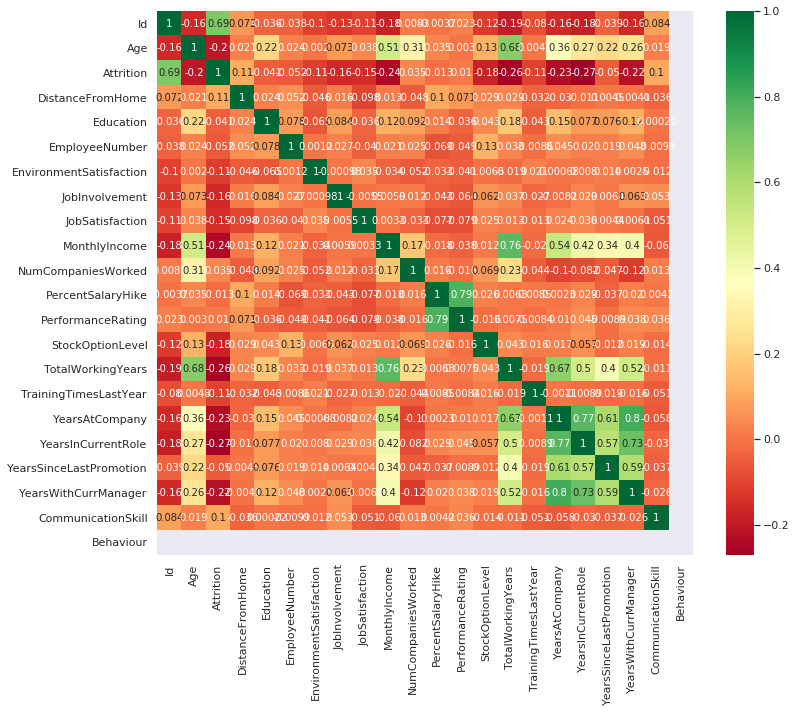

In [264]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test =  train_test_split(train_data.drop(['Attrition' , 'Id' ,'Behaviour'] , axis = 1) , train_data['Attrition'],test_size=1/3)

In [10]:
X_train = pd.get_dummies(X_train , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_test = pd.get_dummies(X_test , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)


In [11]:
# Load libraries
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [13]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'roc_auc'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [271]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [14]:
SEED = 7
np.random.seed(SEED)

In [273]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.780339 (0.036905)
LDA: 0.865445 (0.046898)
KNN: 0.756215 (0.037999)
CART: 0.907229 (0.018750)
NB: 0.772142 (0.045547)
SVM: 0.661043 (0.038322)
AB: 0.903925 (0.030784)
GBM: 0.959990 (0.017883)
RF: 0.995881 (0.005709)
ET: 0.995386 (0.005750)


In [15]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [275]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.7803
1,LDA,0.8654
2,KNN,0.7562
3,CART,0.9072
4,NB,0.7721
5,SVM,0.6610
6,AB,0.9039
7,GBM,0.9600
8,RF,0.9959
9,ET,0.9954


# Feature Engineering
## 4.1. Data Preprocessig

Numerical features preprocessing is different for tree and non tree model.

1) Usually:
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling 

2) Most Often used preprocening are:
- MinMax scaler to [0,1]
- Standard Scaler to mean = 0 and std =1
- Rank (We do not work on it in this data set)
- Using np.log(1+data),  np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [277]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.866385 (0.043165)
standardLDA: 0.865445 (0.046898)
standardKNN: 0.856721 (0.043269)
standardCART: 0.907313 (0.021824)
standardNB: 0.765730 (0.045627)
standardSVM: 0.953967 (0.018532)
standardAB: 0.904372 (0.031296)
standardGBM: 0.960102 (0.017360)
standardRF: 0.994891 (0.006188)
standardET: 0.995199 (0.006037)


,Model,Score,Model,Score
0,LR,0.7803,standardLR,0.8664
1,LDA,0.8654,standardLDA,0.8654
2,KNN,0.7562,standardKNN,0.8567
3,CART,0.9072,standardCART,0.9073
4,NB,0.7721,standardNB,0.7657
5,SVM,0.6610,standardSVM,0.9540
6,AB,0.9039,standardAB,0.9044
7,GBM,0.9600,standardGBM,0.9601
8,RF,0.9959,standardRF,0.9949
9,ET,0.9954,standardET,0.9952


### 4.1.2. MinMax

In [278]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.867955 (0.043418)
minmaxLDA: 0.865445 (0.046898)
minmaxKNN: 0.844768 (0.043559)
minmaxCART: 0.902927 (0.022516)
minmaxNB: 0.765730 (0.045627)
minmaxSVM: 0.929821 (0.025354)
minmaxAB: 0.904234 (0.030371)
minmaxGBM: 0.959517 (0.018113)
minmaxRF: 0.995922 (0.005297)
minmaxET: 0.995760 (0.005057)


,Model,Score,Model,Score,Model,Score
0,LR,0.7803,standardLR,0.8664,minmaxLR,0.8680
1,LDA,0.8654,standardLDA,0.8654,minmaxLDA,0.8654
2,KNN,0.7562,standardKNN,0.8567,minmaxKNN,0.8448
3,CART,0.9072,standardCART,0.9073,minmaxCART,0.9029
4,NB,0.7721,standardNB,0.7657,minmaxNB,0.7657
5,SVM,0.6610,standardSVM,0.9540,minmaxSVM,0.9298
6,AB,0.9039,standardAB,0.9044,minmaxAB,0.9042
7,GBM,0.9600,standardGBM,0.9601,minmaxGBM,0.9595
8,RF,0.9959,standardRF,0.9949,minmaxRF,0.9959
9,ET,0.9954,standardET,0.9952,minmaxET,0.9958


# 5. Algortithm Tuning

In [85]:
X_train_scaled = MinMaxScaler().fit_transform(X_train.drop(['EmployeeNumber','YearsWithCurrManager'],axis=1))
X_test_scaled = MinMaxScaler().fit_transform(X_test.drop(['EmployeeNumber','YearsWithCurrManager'],axis=1))

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [19]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [20]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

## 5.1.Logistic Regression
- C : Regularization value, the more, the stronger the regularization(double). 
- RegularizationType: Can be either "L2" or “L1”. Default is “L2”. 

In [98]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [99]:
LR_RandSearch = RandomSearch(X_train_scaled,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_scaled)

Best: 0.775076 using {'C': 0.7450408455106836, 'penalty': 'l2'}


In [288]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [289]:
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

prediction on test set is: 0.7790055


## 5.2. KNN
- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [290]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)


In [291]:
KNN_GridSearch = GridSearch(X_train_scaled,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_scaled)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7))


Best: 0.917941 using {'n_neighbors': 1}
prediction on test set is: 0.93186


## 5.3. SVC 
- C: The Penalty parameter C of the error term. 
- Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [294]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [295]:
SVC_GridSearch = GridSearch(X_train_scaled,y_train,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_scaled)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_SVC).mean(),7))

Best: 0.912453 using {'C': 2.0, 'kernel': 'poly'}
prediction on test set is: 0.9042357


## 5.4. Decision Tree
- max_depth:  Maximum depth of the tree (double).
- row_subsample: Proportion of observations to consider (double).
- max_features: Proportion of columns (features) to consider in each level (double).

In [296]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [297]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [298]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_scaled,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_scaled)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_CART).mean(),7))

Best: 0.917074 using {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.9042357


## 5.5 AdaBoostClassifier
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
- n_estimators: Number of trees to build.

In [301]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [300]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_scaled,y_train,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_scaled)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_Ad).mean(),7))


Best: 0.882951 using {'learning_rate': 1, 'n_estimators': 300}
prediction on test set is: 0.8508287


## 5.6 GradientBoosting

In [302]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [304]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_scaled,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_scaled)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.938235 using {'learning_rate': 0.1, 'n_estimators': 300}
prediction on test set is: 0.9410681


## 5.7. RandomForest
**Toturial: Tune RandommForest**
## 5.8. ExtraTrees
**Toturial: Tune ExtraTrees**

 # 6. Ensemble Methods

## 6.1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [305]:
from sklearn.ensemble import VotingClassifier

In [306]:
param = {'C': 0.9318970953640817, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 1}
model2 = KNeighborsClassifier(**param)

param = {'C': 2.0, 'kernel': 'poly'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 1, 'n_estimators': 300}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.1, 'n_estimators': 300}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [307]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [310]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_scaled,y_train, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_scaled,y_train)
pred = ensemble_model.predict(X_test_scaled)
print('Accuracy on test:' , (y_test == pred).mean())

Accuracy on train:  0.953890587835542
Accuracy on test: 0.9594843462246777


## Beyond Voting

In [311]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.9318970953640817, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 1}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 2.0, 'kernel': 'poly', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': None, 'max_features':3, 'min_samples_leaf':1}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 1, 'n_estimators': 300}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.1, 'n_estimators': 300}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [312]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [313]:
models = get_models()
P = train_predict(models,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



[MLENS] backend: threading


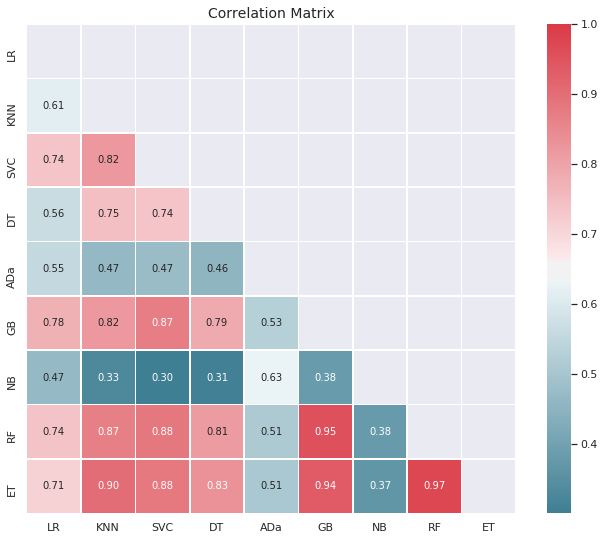

In [314]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)


Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

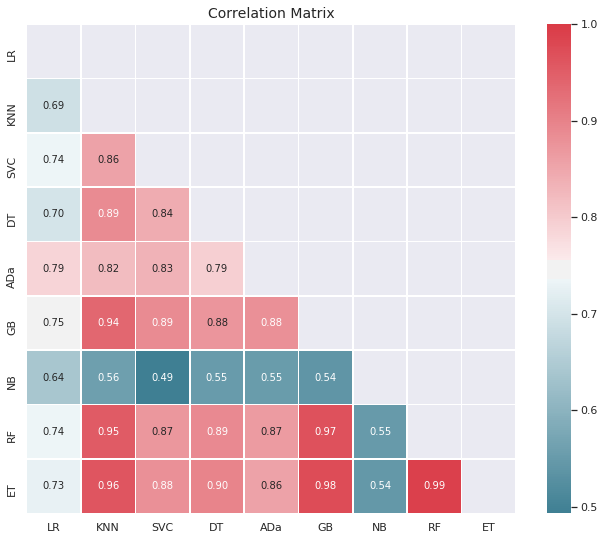

In [316]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test).corr(), inflate=False)

# 6.3 Stacking

In [317]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [ ]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_scaled, y_train)

# Predict the test set
p_sl = sl.predict_proba(X_test_scaled)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))



Fitting 2 layers
Processing layer-1             

In [ ]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [ ]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test== pp).mean())

# Conclusion:
- We could reach 86 % accuracy
- Now you can do more feature engineering 
- Tune better 
- Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
- Stack more diverse model
- Use your creativity 
- Your comments is warmly welcome
> - Thank you, it there is a misstke Please let me know

# Happy Kaggling!

# If the kernel is useful, Please UpVote

In [102]:
from sklearn.metrics import roc_auc_score

In [103]:
assign = pd.read_csv('test.csv')

In [104]:
assign.drop(['YearsWithCurrManager'],axis=1,inplace=True)

In [105]:
assign.drop(['EmployeeNumber'],axis=1,inplace=True)

In [106]:
X_assign =  assign.drop(['Id' ,'Behaviour'] , axis = 1)

In [107]:
X_assign = pd.get_dummies(X_assign , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)

In [108]:
X_assign_scaled = MinMaxScaler().fit_transform(X_assign)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
knn = LogisticRegression(C=0.7450408455106836,penalty = 'l2')

In [111]:
knn.fit(X_train_scaled, y_train)
test_pred = knn.predict(X_test_scaled)
roc_auc_score(y_test , test_pred)

0.8010839483394834

In [112]:
prediction = knn.predict(X_assign_scaled)

In [113]:
submission = pd.DataFrame({
        "Id": assign["Id"],
        "Attrition": prediction
    })

submission.to_csv('lr_submission.csv', index=False)